<a href="https://colab.research.google.com/github/vquinteop/TareasMineriadeDatosSemana1/blob/main/Clase1_Mineria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introducción a la programación - Python

- ## [Librería numpy](https://numpy.org/) (señales discretas)

- ## [Librería sympy](https://www.sympy.org/es/) (emular señales continuas)

In [2]:
import numpy as np # importar libreria numpy
x = 30 #tipo int
y = 36.5 #tipo float

print(type(x),type(y)) #imprimir en pantalla

<class 'int'> <class 'float'>


# Arreglo de datos en numpy

- Señales en continuo

  $x(t) \in \mathbb{R}, \mathbb{C}$

  $t \in \mathbb{R}$

- Señales discretas

  $x[t_k] \in \mathbb{R}, \mathbb{C}$  

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

- Señales digitales

  $x[t_k] \in \{x_0,x_1,\dots,x_{P-1}\};$ $P\in \mathbb{N}$ estados según cantidad de bits del sistema de proceso 

  $t \in \{t_0,t_1,\dots,t_{K-1}\}$; $K \in \mathbb{N}$ muestras

In [3]:
xv = np.array([0,-2.5,10]) #crear array tipo vector
xv

array([ 0. , -2.5, 10. ])

# Listas vs numpy array

- Las listas pueden contener, números, strings, y en general objetos

- Los array de numpy están pensados para procesar números (matrices, tensores).

In [4]:
xl = [0,-2,0.5] # no es señal digital -> lista de números
xl

[0, -2, 0.5]

In [5]:
xl = ['andres marino',0.5, 2] #lista de tres elementos con un string, un flotante y un entero
xl

['andres marino', 0.5, 2]

# Tamaños, indexación y graficar numpy array

In [6]:
xv.shape # vector con 3 elementos - > shape retorna la forma (tamaño del arreglo)

(3,)

In [7]:
xm = np.array([[0,-2.5,10,4],[6,47,70,2],[8,10.2,-698,-0.9]]) #cada lista de números es tratada como una fila de la matriz
xm

array([[   0. ,   -2.5,   10. ,    4. ],
       [   6. ,   47. ,   70. ,    2. ],
       [   8. ,   10.2, -698. ,   -0.9]])

In [8]:
xm.shape

(3, 4)

# En python se indexa desde 0

In [9]:
xv = np.array([-6,5,4.2,3,8,50,16])
print(xv,xv.shape,xv[0])

[-6.   5.   4.2  3.   8.  50.  16. ] (7,) -6.0


# En Python, cuando se indexa por rangos de valores, no se incluye el último elemento

x[t_i,t_f)

In [10]:
xv[1:5] # x[t_0] # no se incluye el elemento 5 que equivale a x[5] = 50

array([5. , 4.2, 3. , 8. ])

*Cuando se piden todos los elementos hasta el final con el operador : si se incluye el último elemento*

In [11]:
# desde el segundo elemento hasta el ultimo
print(xv)
print(xv[1:])

[-6.   5.   4.2  3.   8.  50.  16. ]
[ 5.   4.2  3.   8.  50.  16. ]


In [12]:
#desde antes del tercer elmento hasta el principio
print(xv)
print(xv[:3])

[-6.   5.   4.2  3.   8.  50.  16. ]
[-6.   5.   4.2]


# Para matrices se extiende la misma sintaxis para indexar vectores, pero separando la indexación por filas y por columnas

In [13]:
print(xm)

[[   0.    -2.5   10.     4. ]
 [   6.    47.    70.     2. ]
 [   8.    10.2 -698.    -0.9]]


In [14]:
xm[0:2,:2]

array([[ 0. , -2.5],
       [ 6. , 47. ]])

In [15]:
xm[0:2,0]

array([0., 6.])

In [16]:
xm[0,1:]

array([-2.5, 10. ,  4. ])

In [17]:
np.diag(xm)#diagonal del arreglo (matriz)

array([   0.,   47., -698.])

# Simular cero y pendiente  para acondicionamiento de señales

- Se generará una función para emular el proceso de cero y pendiente en el acondicionamiento de señales.

- Las funciones principales para generar vectores equiespaciados son [linspace](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html), [range](https://www.w3schools.com/python/ref_func_range.asp) y [arange](https://numpy.org/doc/stable/reference/generated/numpy.arange.html)

In [18]:
# crear vector tiempo por rango y por número de muestras
K = 200 # número de muestras
ti = -15 # tiempo incial referencia [s]
tf = 10 # tieimpo final  [s]
# vector de tiempo equiespacioado
tv = np.linspace(start=ti,stop=tf,num=K)
print(tv)
print(tv.shape)
# tiempo muestreo se define según el rango de trabajo en segundos y la cantidad de muestras
Ts = (tf - ti)/K
print(Ts)

[-15.         -14.87437186 -14.74874372 -14.62311558 -14.49748744
 -14.3718593  -14.24623116 -14.12060302 -13.99497487 -13.86934673
 -13.74371859 -13.61809045 -13.49246231 -13.36683417 -13.24120603
 -13.11557789 -12.98994975 -12.86432161 -12.73869347 -12.61306533
 -12.48743719 -12.36180905 -12.2361809  -12.11055276 -11.98492462
 -11.85929648 -11.73366834 -11.6080402  -11.48241206 -11.35678392
 -11.23115578 -11.10552764 -10.9798995  -10.85427136 -10.72864322
 -10.60301508 -10.47738693 -10.35175879 -10.22613065 -10.10050251
  -9.97487437  -9.84924623  -9.72361809  -9.59798995  -9.47236181
  -9.34673367  -9.22110553  -9.09547739  -8.96984925  -8.84422111
  -8.71859296  -8.59296482  -8.46733668  -8.34170854  -8.2160804
  -8.09045226  -7.96482412  -7.83919598  -7.71356784  -7.5879397
  -7.46231156  -7.33668342  -7.21105528  -7.08542714  -6.95979899
  -6.83417085  -6.70854271  -6.58291457  -6.45728643  -6.33165829
  -6.20603015  -6.08040201  -5.95477387  -5.82914573  -5.70351759
  -5.5778894

- Supongamos la función cuadrática:

$x(t) = a t^2 + b;$ 

$\forall t \in [t_i,t_f]$

- Se pretende generar el proceso de discretización según: 

$x[t_k] = a t_k^2 + b$





In [19]:
#parámetros parabola
a = 4  
b = -3
xv = a*(tv**2) + b # creamos parabola en tiempo discreto-> **  pontencia
print(xv)
print(xv.shape)

[ 8.97000000e+02  8.81987753e+02  8.67101765e+02  8.52342037e+02
  8.37708568e+02  8.23201359e+02  8.08820409e+02  7.94565718e+02
  7.80437287e+02  7.66435115e+02  7.52559203e+02  7.38809550e+02
  7.25186157e+02  7.11689023e+02  6.98318149e+02  6.85073533e+02
  6.71955178e+02  6.58963082e+02  6.46097245e+02  6.33357668e+02
  6.20744350e+02  6.08257291e+02  5.95896493e+02  5.83661953e+02
  5.71553673e+02  5.59571652e+02  5.47715891e+02  5.35986389e+02
  5.24383147e+02  5.12906164e+02  5.01555441e+02  4.90330976e+02
  4.79232772e+02  4.68260827e+02  4.57415141e+02  4.46695715e+02
  4.36102548e+02  4.25635641e+02  4.15294993e+02  4.05080604e+02
  3.94992475e+02  3.85030605e+02  3.75194995e+02  3.65485644e+02
  3.55902553e+02  3.46445721e+02  3.37115149e+02  3.27910836e+02
  3.18832782e+02  3.09880988e+02  3.01055453e+02  2.92356178e+02
  2.83783162e+02  2.75336406e+02  2.67015909e+02  2.58821671e+02
  2.50753693e+02  2.42811974e+02  2.34996515e+02  2.27307315e+02
  2.19744375e+02  2.12307

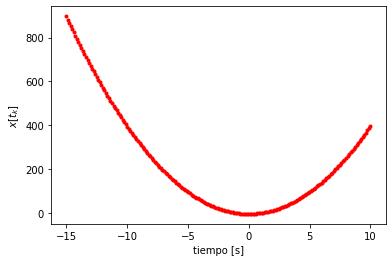

In [20]:
import matplotlib.pyplot as plt #librería para gráficas básicas en python

plt.plot(tv,xv,'r.') #vector en eje horizontal, vector eje vertical, color y marcador
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$') # $ $ ecuación latex
plt.show() #mostrar gráfica

## Cálculo de pendiente y del offset (cero)

$$ y[t_k] \in [y_{min},y_{max}]$$

$$y[t_k] = m x[t_k] + c$$

$$m = \frac{y_{max}-y_{min}}{x_{max}-x_{min}}$$

$$c = y[t_k] - m x[t_k]$$

- Se crea un código tipo función bajo el ambiente def, para generar el cero y pendiente según los valores $y_{max}$ y $y_{min}$ definidos por el usuario.

In [21]:
y_min = 0 # valor min después de cero y pendiente
y_max = 5 # valor max después de cero y pendiente
#crear funcion en python
def my_ceropen(x,ymin = -5, ymax = 5): #en general se pueden definir valores por defecto 
  '''
  Codigo base para simular proceso de cero y pendiente
  Se ingresa arreglo de numpy y los valores min  y max despues de cero y pendiente
  '''
  xmax = max(x) # x.max()
  xmin = min(x) # x.min()
  m = (ymax - ymin)/(xmax - xmin)
  c = ymin - m*xmin
  yv = m*x + c
  return yv 

In [30]:
yv = my_ceropen(xv,ymin=-15,ymax=20) #se llama la función definida en la celda anterior

In [31]:
print(yv)
print(yv.shape)

[  2.5          2.72034746   2.94065998   3.16090264   3.38104052
   3.60103871   3.82086234   4.04047655   4.25984653   4.47893749
   4.6977147    4.91614347   5.13418918   5.35181725   5.56899317
   5.78568252   6.00185095   6.21746417   6.43248801   6.64688836
   6.86063126   7.07368279   7.28600919   7.49757679   7.70835204
   7.91830154   8.127392     8.33559026   8.54286331   8.7491783
   8.95450251   9.15880339   9.36204855   9.56420577   9.76524299
   9.96512834  10.16383013  10.36131686  10.55755721  10.75252008
  10.94617455  11.13848992  11.32943571  11.51898162  11.70709762
  11.89375389  12.07892081  12.26256905  12.44466948  12.62519323
  12.80411168  12.98139646  13.15701947  13.33095286  13.50316905
  13.67364075  13.84234092  14.00924281  14.17431997  14.33754623
  14.4988957   14.6583428   14.81586226  14.9714291   15.12501865
  15.27660657  15.42616882  15.57368169  15.71912179  15.86246606
  16.00369178  16.14277655  16.27969833  16.41443541  16.54696642
  16.677270

- Se grafican la señal original y la señal acondicionada mediante [subplot](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplot.html)

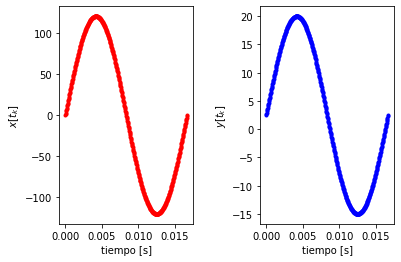

In [32]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5) #ajustar espaciado entre gráficas
plt.show()

Text(0, 0.5, '$x[t_k]$')

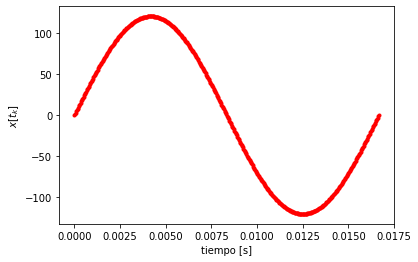

In [33]:
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

Text(0, 0.5, '$y[t_k]$')

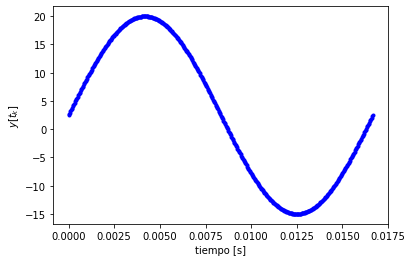

In [34]:
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')

- Se ilustra nuevamente el proceso de acondicionamiento cero y pendiente mediante utilizando una función senoidal

$$x[t_k] = A \sin[w_o t + \phi]$$

$$x[t_k] = A \sin[2 \pi F_o t] = A \sin[2 \pi t / T_o ]$$



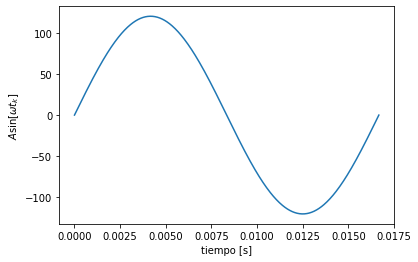

In [35]:
K = 500 # número de muestras
T_o = 1/60 # periodo función sin
A = 120 # amplitud
ti = 0 #tiempo inicial
tf = T_o #tiempo final
tv = np.linspace(ti,tf,num=K) #vector de datos en tiempo
xv = A * np.sin(2*np.pi*tv/T_o) #vector de amplitud

plt.plot(tv,xv)
plt.xlabel('tiempo [s]')
plt.ylabel('$A\sin[\omega t_k]$')
plt.show()

In [36]:
yv = my_ceropen(xv,ymin=0,ymax=5) #se utiliza la función ya creada de cero y pendiente

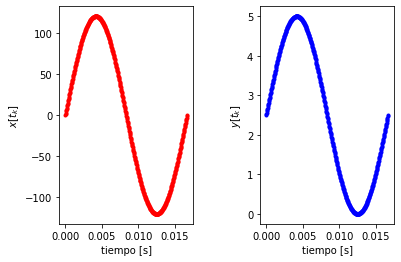

In [37]:
plt.subplot(121) # 1 = #filas, 2 = #columnas, 1 = # dibujo
plt.plot(tv,xv,'r.')
plt.xlabel('tiempo [s]')
plt.ylabel('$x[t_k]$')

plt.subplot(122)
plt.plot(tv,yv,'b.')
plt.xlabel('tiempo [s]')
plt.ylabel('$y[t_k]$')
plt.subplots_adjust(hspace=0.5,wspace=0.5)
plt.show()

# Ejercicio:

- Realice un ejemplo ilustrativo para la solución de un problema lineal por mínimos cuadrados de la forma:


\begin{aligned}
\begin{bmatrix}
x_{11} & x_{12} & \cdots & x_{1P} \\
x_{21} & x_{22} & \cdots & x_{2P} \\
\vdots & \vdots & \ddots & \vdots\\
x_{N1} & x_{N2} & \cdots & x_{NP}
\end{bmatrix} & \begin{bmatrix} w_1 \\ w_2 \\ \vdots \\ w_P \end{bmatrix} =& \begin{bmatrix} y_1 \\ y_2 \\ \vdots \\ y_N \end{bmatrix} 
\end{aligned}

$$\mathbf{X}\mathbf{w} = \mathbf{y}$$

- Tal que:

$$\mathbf{w}^* = \arg\min_\mathbf{w} \|\mathbf{y} - \mathbf{X}\mathbf{w}\|^2_2$$

en donde $\mathbf{y} = \mathbf{y}^* + \mathbf{\eta},$ con $\mathbf{y}^*\in \mathbb{R}^N$ y $\mathbf{\eta}\sim p(\mathbf{\eta})=\mathcal{N}(\mathbf{\eta}|\mathbf{\mu}_\eta,\sigma^2_\eta \mathbf{I})$.

- Consulte en qué consiste la solución por pseudoinversa y realice una implementación en numpy utilizando la descomposición en [valores singulares](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) para $N=100$, $P=3$, $w_1=3.5$, $w_2=-0.5$, $w_3=10$, para una relación cuadrática entrada salida. Asumo ruido Gaussiano con $\sigma^2_\eta=5$ y $\mu=-3$.

- Qué estarategia propone para mitigar el efecto de la media del ruido (traslación en la estimación)?

In [38]:
#Ayuda de código:
#Generación de datos
N = 100 # numero de datos
var = 5 # varianza del ruido
mu = -30 #media del ruido
w = np.array([3.5,-0.5,10]).reshape(-1,1) #cargas tipo vector columna
eta = mu + np.sqrt(var)*np.random.randn(N)

x = np.linspace(-5,5,N)
Xm = np.c_[x[...,np.newaxis]**2,x.reshape(-1,1),np.ones((N,1))] #puede utilizar newaxis o reshape para formar columnas

y = Xm.dot(w)
yn = y + eta[...,np.newaxis]

print(yn.shape,y.shape, Xm.shape, w.shape,eta.shape)




(100, 1) (100, 1) (100, 3) (3, 1) (100,)


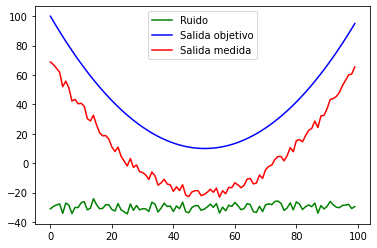

In [39]:
plt.plot(eta,label='Ruido',c='g')
plt.plot(y,label='Salida objetivo',c='b')
plt.plot(yn,label='Salida medida',c='r')
plt.legend()
plt.show()

In [41]:
w = np.linalg.pinv(yn)
print(w)

[[ 8.31660900e-04  8.09282107e-04  7.79247648e-04  7.46062654e-04
   6.28165219e-04  6.73614593e-04  6.18107512e-04  5.10600926e-04
   5.24231554e-04  4.87785508e-04  4.92219958e-04  4.66983878e-04
   3.66041158e-04  3.46982671e-04  3.93637976e-04  3.13936030e-04
   2.50037595e-04  2.24800939e-04  2.26330193e-04  1.97613148e-04
   1.33196910e-04  9.54488710e-05  1.31680168e-04  5.59910331e-05
   1.64353599e-05 -2.25189851e-05  3.84908452e-05 -3.50362220e-05
  -1.44524952e-05 -6.90197092e-05 -7.74974704e-05 -9.64406479e-05
  -1.33456586e-04 -7.23513854e-05 -1.03088996e-04 -1.80570129e-04
  -1.62020554e-04 -1.32820173e-04 -1.71311585e-04 -1.77762320e-04
  -2.31651649e-04 -1.94464911e-04 -2.24430090e-04 -1.77110533e-04
  -2.61462958e-04 -2.74798688e-04 -2.36832821e-04 -2.26005917e-04
  -2.25231695e-04 -2.65705267e-04 -2.57710255e-04 -2.39033394e-04
  -2.14530636e-04 -2.38895383e-04 -2.04933851e-04 -2.79201779e-04
  -2.25851968e-04 -2.51227599e-04 -1.98285709e-04 -2.01662696e-04
  -1.60559